In [1]:
import numpy as np 
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


Using TensorFlow backend.


In [2]:
from keras.utils import to_categorical
img_rows, img_cols = 32, 32


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

input_shape = (img_rows, img_cols, 3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [5]:
hist = model.fit(x_train, y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 91s - loss: 1.6417 - acc: 0.4010 - val_loss: 1.2856 - val_acc: 0.5493
Epoch 2/10
50000/50000 [==============================] - 90s - loss: 1.3176 - acc: 0.5323 - val_loss: 1.1418 - val_acc: 0.6028
Epoch 3/10
50000/50000 [==============================] - 92s - loss: 1.1871 - acc: 0.5796 - val_loss: 1.0449 - val_acc: 0.6400
Epoch 4/10
50000/50000 [==============================] - 98s - loss: 1.1124 - acc: 0.6059 - val_loss: 0.9836 - val_acc: 0.6607
Epoch 5/10
50000/50000 [==============================] - 151s - loss: 1.0606 - acc: 0.6272 - val_loss: 0.9584 - val_acc: 0.6648
Epoch 6/10
50000/50000 [==============================] - 196s - loss: 1.0155 - acc: 0.6422 - val_loss: 0.9017 - val_acc: 0.6840
Epoch 7/10
50000/50000 [==============================] - 197s - loss: 0.9834 - acc: 0.6525 - val_loss: 0.9056 - val_acc: 0.6841
Epoch 8/10
50000/50000 [===========================

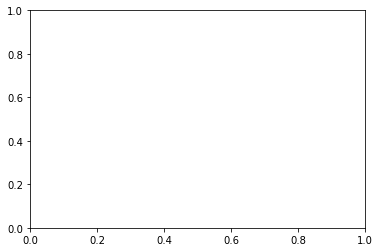

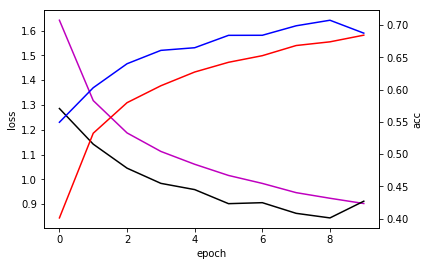

In [7]:
fig, loss_plt = plt.subplots()

acc_plt = loss_plt.twinx()

loss_plt.plot(hist.history['loss'], 'm')
loss_plt.plot(hist.history['val_loss'], 'k')

acc_plt.plot(hist.history['acc'], 'r' )
acc_plt.plot(hist.history['val_acc'], 'b')

loss_plt.set_xlabel('epoch')
loss_plt.set_ylabel('loss')
acc_plt.set_ylabel('acc')



plt.show()